#Table of Contents
* [Modification 1: calculate test_signal in setup()](#Modification-1:-calculate-test_signal-in-setup%28%29)
	* [SIMULATED_SIGNAL_SELECTION is 1 (calculated raised cosine signal, range [0,2])](#SIMULATED_SIGNAL_SELECTION-is-1-%28calculated-raised-cosine-signal,-range-[0,2]%29)
	* [SIMULATED_SIGNAL_SELECTION is 2 (unit impulse function)](#SIMULATED_SIGNAL_SELECTION-is-2-%28unit-impulse-function%29)
	* [SIMULATED_SIGNAL_SELECTION is 3 (raised cosine using lut, range [0,4094])](#SIMULATED_SIGNAL_SELECTION-is-3-%28raised-cosine-using-lut,-range-[0,4094]%29)
	* [SIMULATED_SIGNAL_SELECTION is 4 (rectangular pulse, range [0,1])](#SIMULATED_SIGNAL_SELECTION-is-4-%28rectangular-pulse,-range-[0,1]%29)
	* [SIMULATED_SIGNAL_SELECTION is 5 (rectangular modulation of raised cosine, range [0,2])](#SIMULATED_SIGNAL_SELECTION-is-5-%28rectangular-modulation-of-raised-cosine,-range-[0,2]%29)
	* [SIMULATED_SIGNAL_SELECTION is 6 (Gaussian modulation of raised cosine, range [0,2])](#SIMULATED_SIGNAL_SELECTION-is-6-%28Gaussian-modulation-of-raised-cosine,-range-[0,2]%29)
* [Modification 2: move serial.print statements to loop()](#Modification-2:-move-serial.print-statements-to-loop%28%29)
	* [OUTPUT_SAMPLE_INTERVAL = 1](#OUTPUT_SAMPLE_INTERVAL-=-1)
	* [OUTPUT_SAMPLE_INTERVAL = 2](#OUTPUT_SAMPLE_INTERVAL-=-2)
* [To do next](#To-do-next)
* [Modification 3: Cosine multiplication for signal demodulation](#Modification-3:-Cosine-multiplication-for-signal-demodulation)


In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [3]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

# Modification 1: calculate test_signal in setup()

__Purpose__: Rather than copying and pasting a large array of data into the code, just calculate the data in setup().

## SIMULATED_SIGNAL_SELECTION is 1 (calculated raised cosine signal, range [0,2])

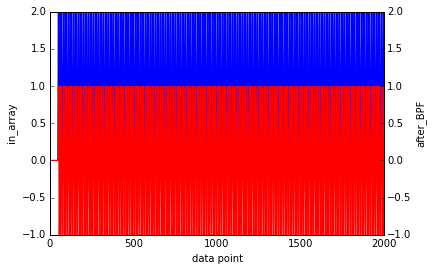

In [20]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(40, 140)

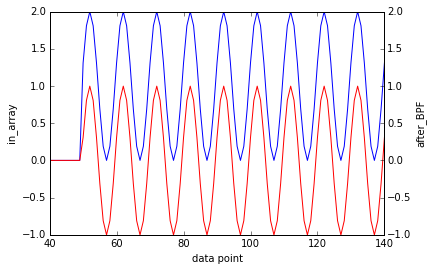

In [24]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(40,140)

## SIMULATED_SIGNAL_SELECTION is 2 (unit impulse function)

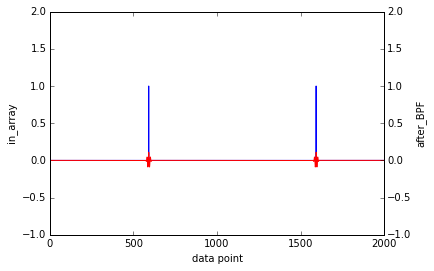

In [25]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(570, 610)

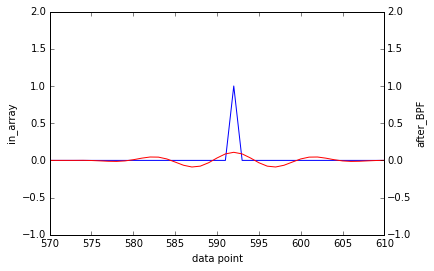

In [27]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(570,610)

__Conclusion__: Both of these work fine

## SIMULATED_SIGNAL_SELECTION is 3 (raised cosine using lut, range [0,4094])

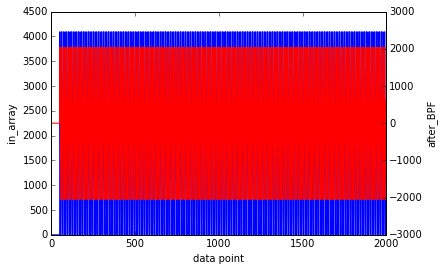

In [76]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(570, 610)

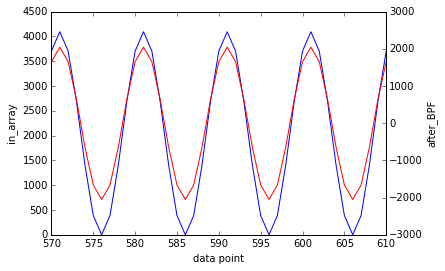

In [77]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(570,610)

In [78]:
print(values[575:580,0], values[580:585,0])
print(values[575:580,1], values[580:585,1])

[  390.     0.   390.  1414.  2679.] [ 3703.  4094.  3703.  2679.  1414.]
[-1660.15259 -2051.14624 -1660.15259  -636.51617   628.76685] [ 1652.40295  2043.39661  1652.40271   628.76709  -636.51611]


## SIMULATED_SIGNAL_SELECTION is 4 (rectangular pulse, range [0,1])

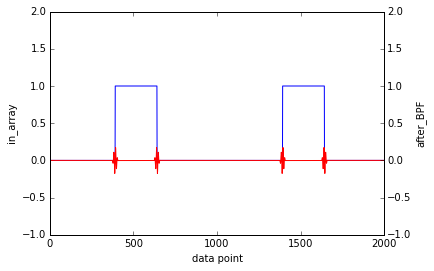

In [44]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(350, 700)

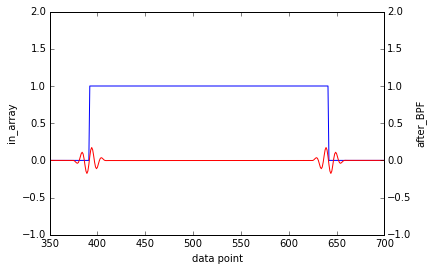

In [48]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(350,700)

## SIMULATED_SIGNAL_SELECTION is 5 (rectangular modulation of raised cosine, range [0,2])

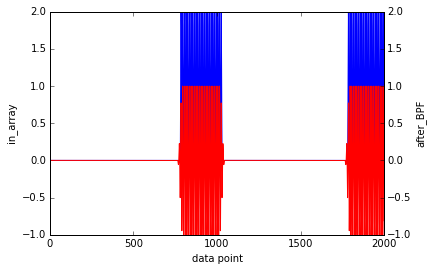

In [49]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(750, 850)

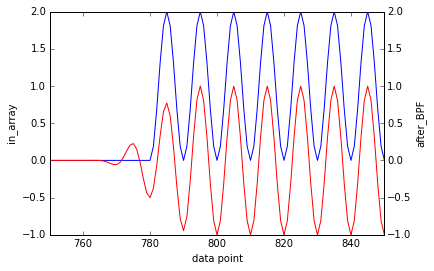

In [51]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(750,850)

## SIMULATED_SIGNAL_SELECTION is 6 (Gaussian modulation of raised cosine, range [0,2])

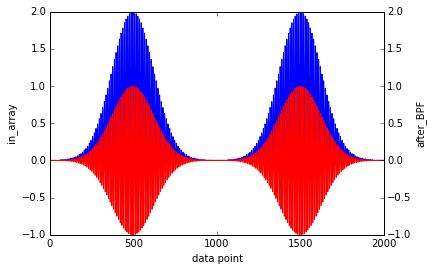

In [53]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(400, 600)

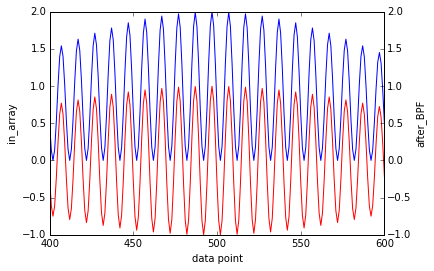

In [55]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(400,600)

# Modification 2: move serial.print statements to loop()

__Purpose__: Take serial.print statements out of the interrupt and put them into the main loop in preparation for choosing to send fewer samples over the serial port to the computer. The parameter _OUTPUT_SAMPLE_INTERVAL_ sets how many interrupts pass before printing the next values.

## OUTPUT_SAMPLE_INTERVAL = 1

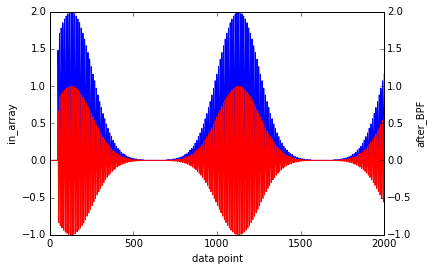

In [72]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(0, 200)

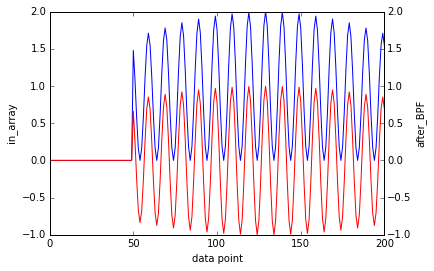

In [73]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(0,200)

## OUTPUT_SAMPLE_INTERVAL = 2

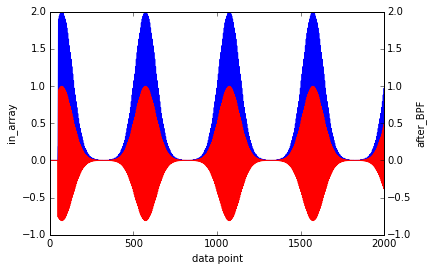

In [74]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

(0, 200)

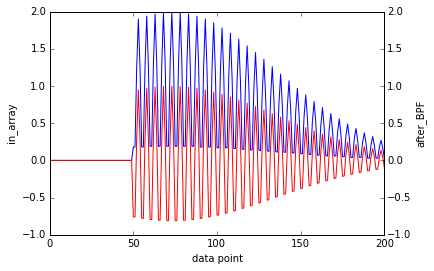

In [75]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(0,200)

# To do next

1. Add two more simulated signals:
  - DONE - cosine from the look up table rather than directly calculated (make this option 3)
  - DONE - rectangular pulse
  - DONE - cosine modulated by rectangular pulse
  - DONE - cosine modulated by gaussian
2. DONE - Change writing to serial
  - Don't do this in the interrupt
  - Write in loop() for an arbitrarily selected period (i.e., number of times the interrupt is called). For example if the period is set to 10, then values are written every 10 times the interrupt is called.
3. Add cosine multiplication. Must be extremely careful about indexing. I think it's going to be something like...
  - DONE - Make a new cosine look up table that is a float array in the range [-1,1]: cosine_lut
  - DONE - Change dac_lut to be calculated based on cosine_lut
  - Figure out cosine multiplication indexing & implement
4. Add low pass filter

# Modification 3: Cosine multiplication for signal demodulation

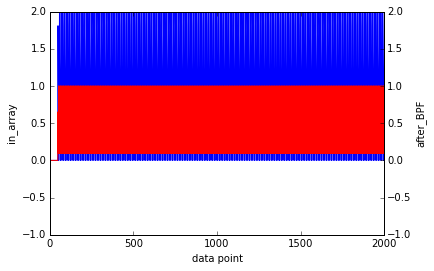

In [98]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point');

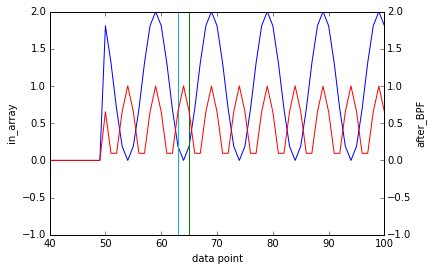

In [99]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(40,100)
position, delta = 63, 2
ax.axvline(position, color='c')
ax.axvline(position+delta, color='g');

[['0.00', '0.00129', '0.00089', '0.00000'], ['0.00', '-0.00153', '-0.00029', '-0.00000'], ['0.00', '-0.01373', '-0.00000', '-0.00000'], ['0.00', '-0.03539', '-0.00676', '-0.00001'], ['0.00', '-0.05645', '-0.03901', '-0.00004']]
(2000, 4)


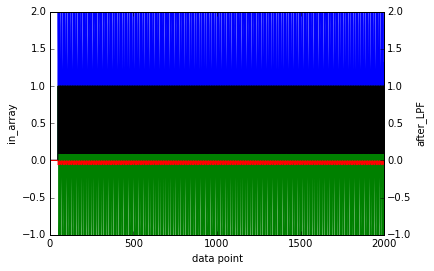

In [141]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

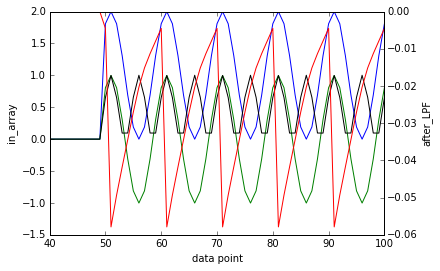

In [143]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(40,100)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');

[['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000'], ['0.00', '0.00000', '0.00000', '0.00000']]
(2000, 4)


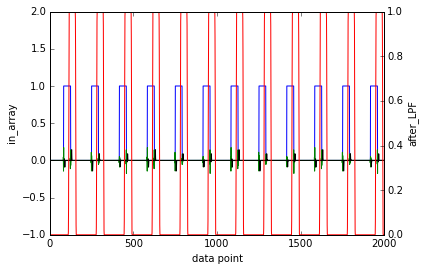

In [139]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 115200)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()

#print(temp.shape)
print(temp[:5])

values4 = np.zeros((n_values, 4))
print(values4.shape)

for i in range(50,n_values,1):
    values4[i,0] = float (temp[i][0])
    values4[i,1] = float (temp[i][1])
    values4[i,2] = float (temp[i][2])
    values4[i,3] = float (temp[i][3])

fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point');

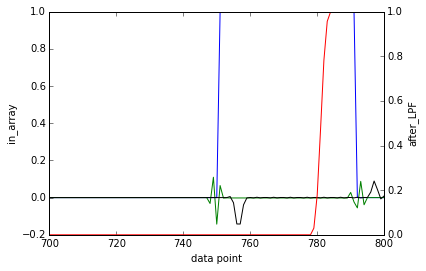

In [140]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values4[:,0])
ax.plot(range(n_values), values4[:,1])
ax.plot(range(n_values), values4[:,2], 'k')
ax2 = ax.twinx()
ax2.plot(range(n_values), values4[:,3], 'r')
#ax.set_ylim(-1, 2)
#ax2.set_ylim(-1, 2)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_LPF')
ax.set_xlabel('data point')
ax.set_xlim(700,800)
position, delta = 63, 2
#ax.axvline(position, color='c')
#ax.axvline(position+delta, color='g');